# Final Project Part 4: Modeling Performance


In [2]:
##import the needed Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt # Matlab-style plott
import seaborn as sns
color = sns.color_palette(sns.hls_palette(8, l=.3, s=.8))
from sklearn import feature_selection, linear_model, metrics#scikit-learn- Regression
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn import linear_model, metrics
from sklearn import feature_selection

In [3]:
df = pd.read_csv('cleandata.csv')
df.head()

,Unnamed: 0,order_id,reordered,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,...,department_pets,department_produce,department_snacks,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,basket_count
0,0,1,1,0,0,0,0,0,1,1,...,0,1,0,112108,train,4,4,10,9.0,8
1,1,1,1,0,0,0,0,0,1,1,...,0,1,0,112108,train,4,4,10,9.0,8
2,2,1,1,0,0,0,0,0,1,1,...,0,1,0,112108,train,4,4,10,9.0,8
3,3,1,1,0,0,0,0,0,1,1,...,0,1,0,112108,train,4,4,10,9.0,8
4,4,1,1,0,0,0,0,0,1,1,...,0,1,0,112108,train,4,4,10,9.0,8


In [4]:
del df['Unnamed: 0']
del df['reordered']
df.head()

,order_id,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,department_deli,department_dry goods pasta,...,department_pets,department_produce,department_snacks,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,basket_count
0,1,0,0,0,0,0,1,1,0,0,...,0,1,0,112108,train,4,4,10,9.0,8
1,1,0,0,0,0,0,1,1,0,0,...,0,1,0,112108,train,4,4,10,9.0,8
2,1,0,0,0,0,0,1,1,0,0,...,0,1,0,112108,train,4,4,10,9.0,8
3,1,0,0,0,0,0,1,1,0,0,...,0,1,0,112108,train,4,4,10,9.0,8
4,1,0,0,0,0,0,1,1,0,0,...,0,1,0,112108,train,4,4,10,9.0,8


In [5]:
#splitting up the orders by Set

df_prior = df[df.eval_set=='prior']
df_train = df[df.eval_set=='train']
df_test = df[df.eval_set=='test']



In [6]:
df_prior.head()

,order_id,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,department_deli,department_dry goods pasta,...,department_pets,department_produce,department_snacks,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,basket_count
8,2,0,0,0,0,0,0,1,0,0,...,0,1,0,202279,prior,3,5,9,8.0,9
9,2,0,0,0,0,0,0,1,0,0,...,0,1,0,202279,prior,3,5,9,8.0,9
10,2,0,0,0,0,0,0,1,0,0,...,0,1,0,202279,prior,3,5,9,8.0,9
11,2,0,0,0,0,0,0,1,0,0,...,0,1,0,202279,prior,3,5,9,8.0,9
12,2,0,0,0,0,0,0,1,0,0,...,0,1,0,202279,prior,3,5,9,8.0,9


In [7]:
df_train.head()

,order_id,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,department_deli,department_dry goods pasta,...,department_pets,department_produce,department_snacks,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,basket_count
0,1,0,0,0,0,0,1,1,0,0,...,0,1,0,112108,train,4,4,10,9.0,8
1,1,0,0,0,0,0,1,1,0,0,...,0,1,0,112108,train,4,4,10,9.0,8
2,1,0,0,0,0,0,1,1,0,0,...,0,1,0,112108,train,4,4,10,9.0,8
3,1,0,0,0,0,0,1,1,0,0,...,0,1,0,112108,train,4,4,10,9.0,8
4,1,0,0,0,0,0,1,1,0,0,...,0,1,0,112108,train,4,4,10,9.0,8


In [8]:
df_test.head()

,order_id,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,department_deli,department_dry goods pasta,...,department_pets,department_produce,department_snacks,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,basket_count


In [8]:
order_id                           1
reordered                          1
department_babies                  0
department_bakery                  0
department_beverages               0
department_breakfast               0
department_bulk                    0
department_canned goods            1
department_dairy eggs              1
department_deli                    0
department_dry goods pasta         0
department_frozen                  0
department_household               0
department_international           0
department_meat seafood            0
department_missing                 0
department_other                   0
department_pantry                  0
department_personal care           0
department_pets                    0
department_produce                 1
department_snacks                  0
user_id                       112108
eval_set                       train
order_number                       4
order_dow                          4
order_hour_of_day                 10
days_since_prior_order             9
basket_count                       8
Name: 0, dtype: object

SyntaxError: invalid syntax (<ipython-input-8-a08e024f9d55>, line 1)

                            basket_count  department_snacks  \
basket_count                    1.000000           0.357155   
department_snacks               0.357155           1.000000   
department_produce              0.277252           0.033863   
department_pets                 0.065247           0.027037   
department_personal care        0.155066           0.069415   
department_pantry               0.342720           0.107367   
department_other                0.062284           0.019291   
department_missing              0.105420           0.031461   
department_meat seafood         0.263409           0.053101   
department_international        0.218232           0.056842   
department_household            0.184731           0.074032   
department_frozen               0.339258           0.150142   
department_dry goods pasta      0.345597           0.102808   
department_deli                 0.331544           0.157895   
department_dairy eggs           0.334674           0.11

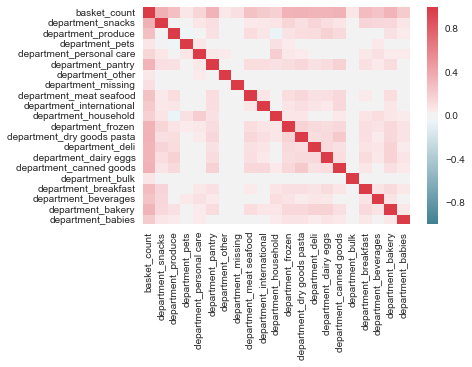

In [9]:
#Edit Data to create first regression & See correlations based on departments

columns_to_keep = ['basket_count', 'department_snacks', 'department_produce', 'department_pets','department_personal care', 'department_pantry', 'department_other', 'department_missing', 'department_meat seafood', 'department_international', 'department_household', 'department_frozen', 'department_dry goods pasta', 'department_deli', 'department_dairy eggs', 'department_canned goods', 'department_bulk', 'department_breakfast', 'department_beverages', 'department_bakery', 'department_babies']
data = df_prior[columns_to_keep]

cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = data[columns_to_keep].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)



P Values: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
Coefficients: [ 3.17303724  4.0682438   1.47020394  1.86471505  2.84678067  2.34308557
  3.42033061  2.28185628  2.81118552  1.90402229  2.41523817  2.61605598
  2.9319955   3.33939645  2.96195038  3.03207047  2.85292723  2.72306267
  2.39198866  3.63027709]
y-intercept: -2.92604698141
R-Squared: 0.601097163272


/Users/alastra/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/Users/alastra/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


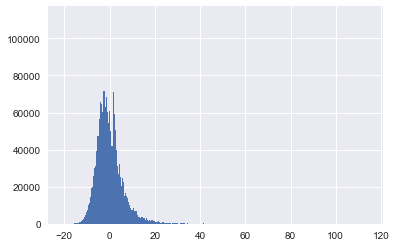

In [10]:


def get_linear_model_metrics(X, y, algo):
    # get the pvalue of X given y. Ignore f-stat for now.
    pvals = feature_selection.f_regression(X, y)[1]
    # start with an empty linear regression object
    # .fit() runs the linear regression function on X and y
    algo.fit(X,y)
    residuals = (y-algo.predict(X)).values

    # print the necessary values
    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,y)
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(y))))
    # keep the model
    return algo

X = data.loc[:,['department_snacks', 'department_produce', 'department_pets','department_personal care', 'department_pantry', 'department_other', 'department_missing', 'department_meat seafood', 'department_international', 'department_household', 'department_frozen', 'department_dry goods pasta', 'department_deli', 'department_dairy eggs', 'department_canned goods', 'department_bulk', 'department_breakfast', 'department_beverages', 'department_bakery', 'department_babies']]
y = data["basket_count"]
lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)

In [11]:
columns_to_keepa = ['basket_count','order_dow','order_hour_of_day']
datab = df_prior[columns_to_keepa]
df_datab= pd.get_dummies(datab, columns=['order_dow','order_hour_of_day'], drop_first=False)
df_datab.head()

,basket_count,order_dow_0,order_dow_1,order_dow_2,order_dow_3,order_dow_4,order_dow_5,order_dow_6,order_hour_of_day_0,order_hour_of_day_1,...,order_hour_of_day_14,order_hour_of_day_15,order_hour_of_day_16,order_hour_of_day_17,order_hour_of_day_18,order_hour_of_day_19,order_hour_of_day_20,order_hour_of_day_21,order_hour_of_day_22,order_hour_of_day_23
8,9,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,9,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,9,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,9,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_datab.loc[8].transpose()

basket_count            9
order_dow_0             0
order_dow_1             0
order_dow_2             0
order_dow_3             0
order_dow_4             0
order_dow_5             1
order_dow_6             0
order_hour_of_day_0     0
order_hour_of_day_1     0
order_hour_of_day_2     0
order_hour_of_day_3     0
order_hour_of_day_4     0
order_hour_of_day_5     0
order_hour_of_day_6     0
order_hour_of_day_7     0
order_hour_of_day_8     0
order_hour_of_day_9     1
order_hour_of_day_10    0
order_hour_of_day_11    0
order_hour_of_day_12    0
order_hour_of_day_13    0
order_hour_of_day_14    0
order_hour_of_day_15    0
order_hour_of_day_16    0
order_hour_of_day_17    0
order_hour_of_day_18    0
order_hour_of_day_19    0
order_hour_of_day_20    0
order_hour_of_day_21    0
order_hour_of_day_22    0
order_hour_of_day_23    0
Name: 8, dtype: int64

                      basket_count  order_dow_0  order_dow_1  order_dow_2  \
basket_count              1.000000     0.039555     0.007383    -0.022296   
order_dow_0               0.039555     1.000000    -0.223871    -0.188134   
order_dow_1               0.007383    -0.223871     1.000000    -0.177873   
order_dow_2              -0.022296    -0.188134    -0.177873     1.000000   
order_dow_3              -0.033500    -0.178429    -0.168697    -0.141768   
order_dow_4              -0.024738    -0.176928    -0.167278    -0.140575   
order_dow_5              -0.002058    -0.187922    -0.177672    -0.149310   
order_hour_of_day_1       0.002626     0.000467    -0.002628    -0.000532   
order_hour_of_day_2       0.001461    -0.000964    -0.002305    -0.001369   
order_hour_of_day_3       0.001810    -0.001921    -0.003782     0.000812   
order_hour_of_day_4       0.005325    -0.003539    -0.003278    -0.000287   
order_hour_of_day_5       0.000836    -0.007874    -0.001500     0.002285   

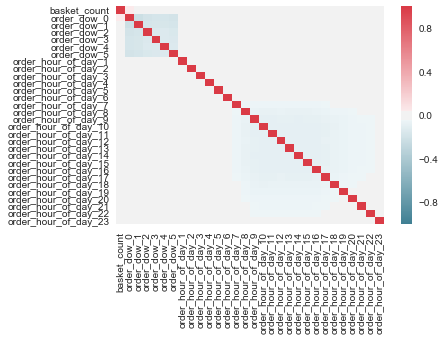

In [12]:
columns_to_keepb = ['basket_count','order_dow_0','order_dow_1','order_dow_2','order_dow_3','order_dow_4','order_dow_5','order_hour_of_day_1','order_hour_of_day_2','order_hour_of_day_3','order_hour_of_day_4','order_hour_of_day_5','order_hour_of_day_6','order_hour_of_day_7', 'order_hour_of_day_8', 'order_hour_of_day_9', 'order_hour_of_day_10', 'order_hour_of_day_11', 'order_hour_of_day_12', 'order_hour_of_day_13', 'order_hour_of_day_14', 'order_hour_of_day_15', 'order_hour_of_day_16', 'order_hour_of_day_17', 'order_hour_of_day_18', 'order_hour_of_day_19', 'order_hour_of_day_20', 'order_hour_of_day_21', 'order_hour_of_day_22','order_hour_of_day_23']
datac = df_datab[columns_to_keepb]


cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = datac[columns_to_keepb].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)



P Values: [  0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   1.01300131e-031   1.46367775e-050   8.85541979e-017
   6.64647646e-025   4.87051971e-202   1.94868594e-006   1.89831559e-109
   8.66467556e-234   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   3.33228485e-287   6.56410039e-082   3.73085240e-034
   0.00000000e+000   0.00000000e+000   0.00000000e+000   0.00000000e+000
   0.00000000e+000   1.55078127e-134   0.00000000e+000   0.00000000e+000
   0.00000000e+000]
Coefficients: [ 0.18418994 -0.45837851 -1.1376072  -1.45265595 -1.23680608 -0.642327
 -0.09237608 -0.2030593  -0.04829538  0.79733612 -0.25169836  0.01043609
 -0.12029103 -0.13520175 -0.1746029  -0.10250025 -0.15359368 -0.31604865
 -0.4166791  -0.59403056 -0.78505558 -0.96429715 -1.26071563 -1.5879151
 -1.57603259 -0.70513684  0.56704196  0.97138459  0.68269736]
y-intercept: 16.7917886052
R-Squared: 0.00720666247426


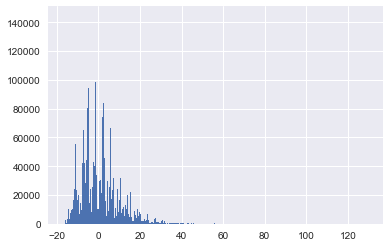

In [13]:


X = datac.loc[:,['order_dow_0','order_dow_1','order_dow_2','order_dow_3','order_dow_4','order_dow_5','order_hour_of_day_1','order_hour_of_day_2','order_hour_of_day_3','order_hour_of_day_4','order_hour_of_day_5','order_hour_of_day_6','order_hour_of_day_7', 'order_hour_of_day_8', 'order_hour_of_day_9', 'order_hour_of_day_10', 'order_hour_of_day_11', 'order_hour_of_day_12', 'order_hour_of_day_13', 'order_hour_of_day_14', 'order_hour_of_day_15', 'order_hour_of_day_16', 'order_hour_of_day_17', 'order_hour_of_day_18', 'order_hour_of_day_19', 'order_hour_of_day_20', 'order_hour_of_day_21', 'order_hour_of_day_22','order_hour_of_day_23']]
y = datac["basket_count"]
lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)

In [14]:
columns_to_keepc = ['basket_count','order_number','days_since_prior_order']
datad = df_prior[columns_to_keepc]
datad=datad.dropna()


                        basket_count  order_number  days_since_prior_order
basket_count                1.000000     -0.007351                0.080590
order_number               -0.007351      1.000000               -0.358422
days_since_prior_order      0.080590     -0.358422                1.000000
Axes(0.125,0.125;0.62x0.755)


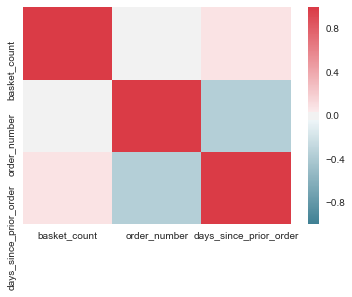

In [15]:


cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = datad[columns_to_keepc].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)



P Values: [ 0.  0.]
Coefficients: [ 0.01341501  0.09731443]
y-intercept: 14.3829273289
R-Squared: 0.00702686915257


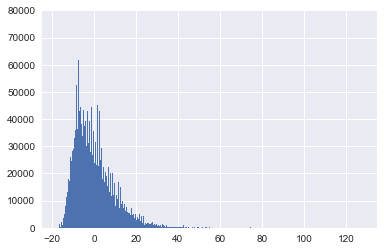

In [16]:

X = datad.loc[:,['order_number','days_since_prior_order']]
y = datad['basket_count']
lm = linear_model.LinearRegression()
lm = get_linear_model_metrics(X, y, lm)

In [ ]:
columns_to_keep = ['basket_count', 'department_snacks', 'department_produce', 'department_pets','department_personal care', 'department_pantry', 'department_other', 'department_missing', 'department_meat seafood', 'department_international', 'department_household', 'department_frozen', 'department_dry goods pasta', 'department_deli', 'department_dairy eggs', 'department_canned goods', 'department_bulk', 'department_breakfast', 'department_beverages', 'department_bakery', 'department_babies']
data_test = df_train[columns_to_keep]

In [ ]:
X_train = data.loc[:,['department_snacks', 'department_produce', 'department_pets','department_personal care', 'department_pantry', 'department_other', 'department_missing', 'department_meat seafood', 'department_international', 'department_household', 'department_frozen', 'department_dry goods pasta', 'department_deli', 'department_dairy eggs', 'department_canned goods', 'department_bulk', 'department_breakfast', 'department_beverages', 'department_bakery', 'department_babies']]
y_train = data["basket_count"]

alphas = np.logspace(-10, 10, 21)
gs = GridSearchCV(
    cv=10,
    estimator = linear_model.Ridge(),
    param_grid={'alpha': alphas, 'fit_intercept': [True, False], },
    scoring='mean_squared_error')

gs.fit(X_train, y_train)

In [ ]:
X_test = data_test.loc[:,['department_snacks', 'department_produce', 'department_pets','department_personal care', 'department_pantry', 'department_other', 'department_missing', 'department_meat seafood', 'department_international', 'department_household', 'department_frozen', 'department_dry goods pasta', 'department_deli', 'department_dairy eggs', 'department_canned goods', 'department_bulk', 'department_breakfast', 'department_beverages', 'department_bakery', 'department_babies']]
y_test = data_test["basket_count"]

In [ ]:
predictions1 = gs.best_estimator_.predict(X_test)

In [ ]:
mean_squared_error(y_test, predictions1)